# D22019-Harshitha Immaaneni

# Loading Libraries

In [91]:
import pandas as pd
import numpy as np

In [92]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV , GridSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.evaluate import bias_variance_decomp
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

# Loading Dataset

In [157]:
df=pd.read_csv("Dataset.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


This dataset contains 303 rows and 14 columns

# Data- preprocessing

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [158]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [95]:
#there are no null values in the dataset

In [96]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'], dtype='object')

In [97]:
df.age.unique()

array([63, 67, 37, 41, 56, 62, 57, 53, 44, 52, 48, 54, 49, 64, 58, 60, 50,
       66, 43, 40, 69, 59, 42, 55, 61, 65, 71, 51, 46, 45, 39, 68, 47, 34,
       35, 29, 70, 77, 38, 74, 76], dtype=int64)

In [98]:
df.cp.unique()

array([0, 3, 2, 1], dtype=int64)

## Descripition of columns

'age': Age of the patient in years

'sex': Gender of the patient (0 = female, 1 = male)

'cp': Chest pain type, as reported by the patient (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)

'trestbps': Resting blood pressure (in mm Hg) when the patient was admitted to the hospital

'chol': Serum cholesterol level (in mg/dL) when the patient was admitted to the hospital

'fbs': Fasting blood sugar level (in mg/dL) measured after an overnight fast (1 = if the level is higher than 120 mg/dL, 0 = if the level is lower than 120 mg/dL)

'restecg': Resting electrocardiographic results, indicating whether the patient has normal, ST-T wave abnormality, or left ventricular hypertrophy

'thalach': Maximum heart rate achieved during the exercise stress test

'exang': Exercise-induced angina, indicating whether the patient experienced chest pain or discomfort during the exercise stress test (1 = yes, 0 = no)

'oldpeak': ST depression induced by exercise relative to rest

'slope': The slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)

'ca': Number of major vessels (0-3) colored by fluoroscopy

'thal': A blood disorder called thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect)

'target': The presence of heart disease (0 = no, 1 = yes)

In [99]:
for col in df.columns:
    unique_values = np.unique(df[col])
    print(f'Unique values in {col}: {unique_values}')

Unique values in age: [29 34 35 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 74 76 77]
Unique values in sex: [0 1]
Unique values in cp: [0 1 2 3]
Unique values in trestbps: [ 94 100 101 102 104 105 106 108 110 112 114 115 117 118 120 122 123 124
 125 126 128 129 130 132 134 135 136 138 140 142 144 145 146 148 150 152
 154 155 156 158 160 164 165 170 172 174 178 180 192 200]
Unique values in chol: [126 131 141 149 157 160 164 166 167 168 169 172 174 175 176 177 178 180
 182 183 184 185 186 187 188 192 193 195 196 197 198 199 200 201 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 239 240 241
 242 243 244 245 246 247 248 249 250 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 273 274 275 276 277 278 281
 282 283 284 286 288 289 290 293 294 295 298 299 300 302 303 304 305 306
 307 308 309 311 313 315 318

# Reading all the  categorical variables and continous variables

In [100]:
categorical = []
continuos = []
for cols in df.columns:
    if len(df[cols].unique()) < 10:
        categorical.append(cols)
    else:
        continuos.append(cols)
categorical, continuos

(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target'],
 ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])

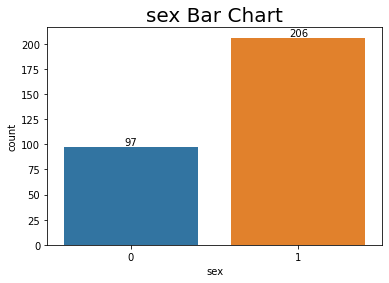

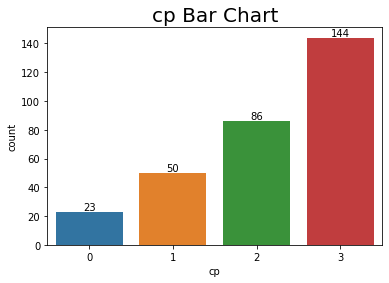

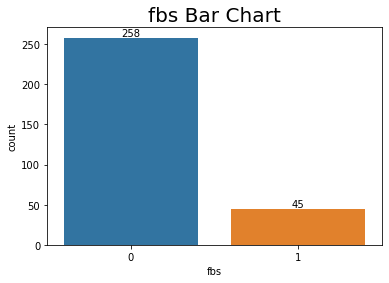

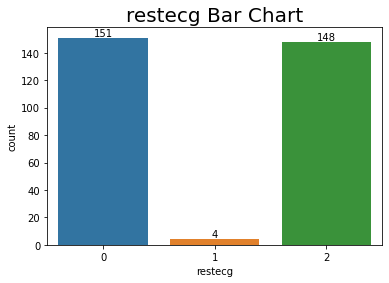

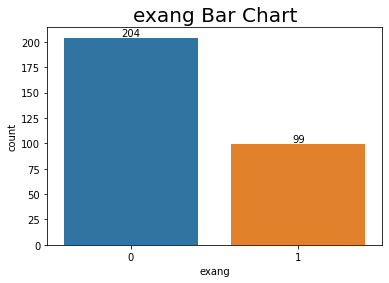

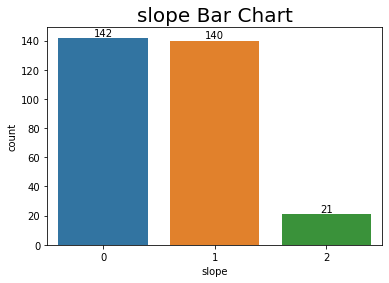

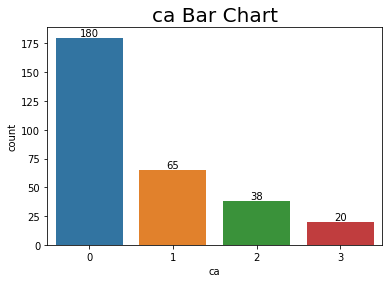

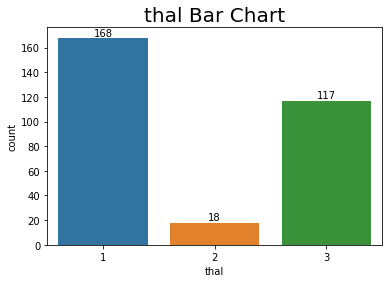

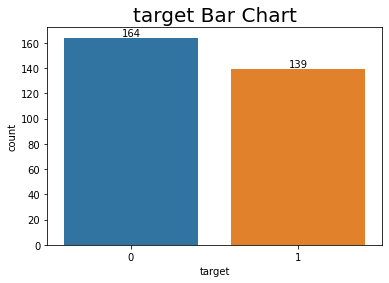

In [101]:
for col in categorical:
    ax = sns.countplot(x=col, data=df)
    for i in ax.containers:
        plt.title("{} Bar Chart".format(col),fontsize=20)
        #plt.savefig(directory + r'/%s.png' %col,dpi=1000,orientation ='landscape',pad_inches = 1,facecolor='yellow') 
        ax.bar_label(i,)
    plt.show()

# Exploratory Data Analysis (EDA)

Let's find how many people have heart disease and how many people doesn't have heart disease

Under our analysis, we found that 139 people are suffering from heart disease, and 164 are healthy.

There are 97 Females and 206 males in the dataset considered.

The proportion of infected men is greater than that of females

normal patients with Resting electrocardiographic results 151 and their are 4  patients with ST-T wave abnormality
and left ventricular hypertrophy patients are 148

 People having lower blood level are more likely to have heart disesase

# Univariant analysis

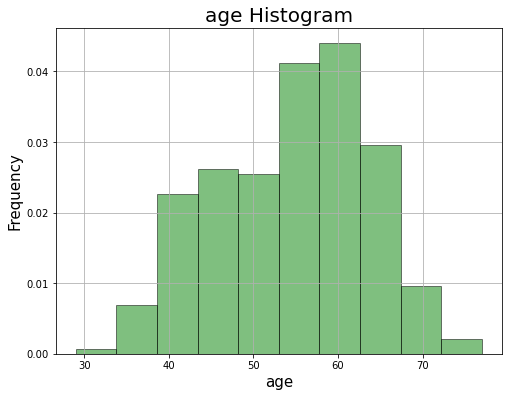

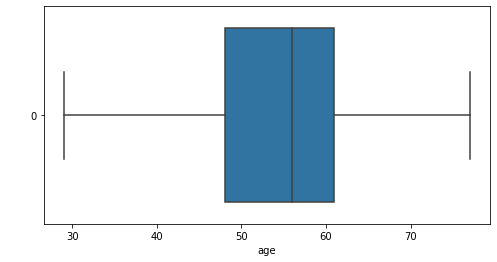

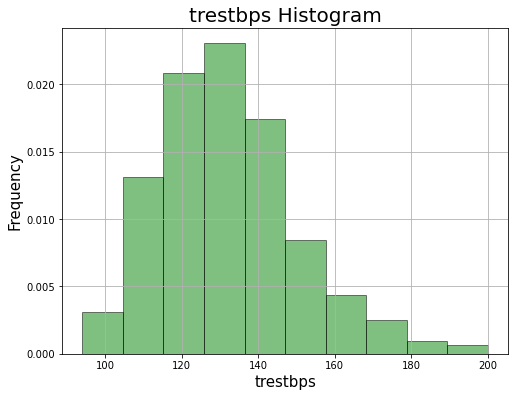

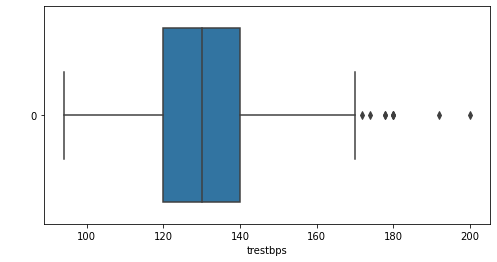

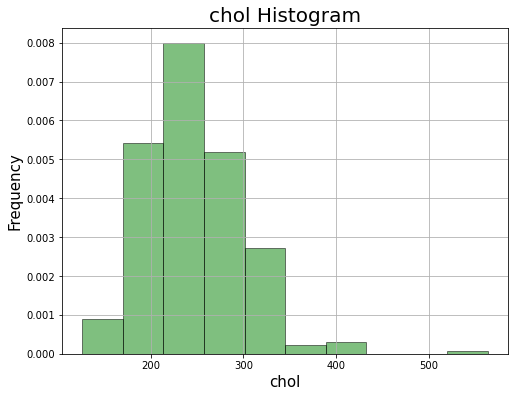

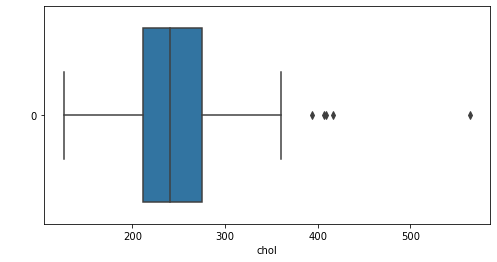

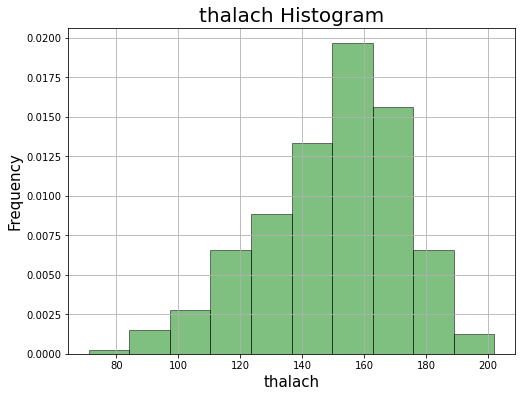

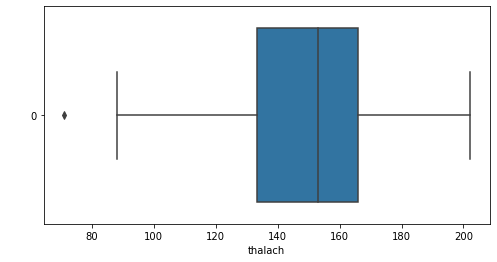

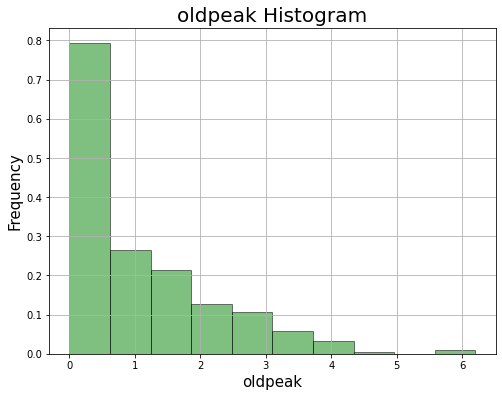

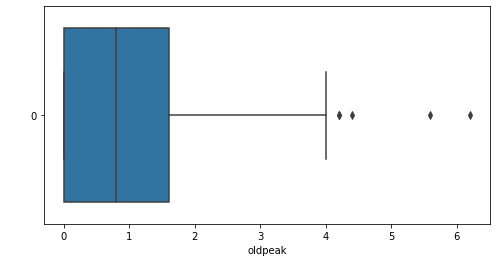

In [102]:
#plotting histogram and boxplot for each numerical variable
for i in continuos:
    plt.subplot(1,1,1) #(row, column, plot)
    # plotting histogram for each numerical variable
    df['%s'%i].plot(kind='hist',alpha=0.5, figsize=(8,6), color="Green",grid=True,edgecolor='black',density = True)
    #data['%s'%i].plot(kind='kde',linewidth=2.5,color="black")   
    plt.xlabel('%s'%i,fontsize=15)
    plt.ylabel("Frequency",fontsize=15)
    plt.title("{} Histogram".format(i),fontsize=20)
    #plt.savefig(directory + r'/%s.png' %i,dpi=1000,orientation ='landscape',pad_inches = 1,facecolor='yellow') 
    plt.show()

    
    plt.figure(figsize=(8, 4))

# for i , col in enumerate(continuos, 1):
    plt.subplot(1, 1, 1)
    sns.boxplot(data=df[i],orient='h')
    #plt.legend()
    plt.xlabel(i)
    plt.ylabel(' ',fontsize=20)
    plt.show()

we observe that their are outliers oldpeak,thalach,trestbps . we will investigate the outliers in further

patients having age group of 50- 69 are more likely to have heart disease

In [103]:
df['chol'].mean()

246.69306930693068

In [104]:
df['chol'].median()

241.0

The distribution of patients having cholestral ranges from 246

# BI-Variant Analysis

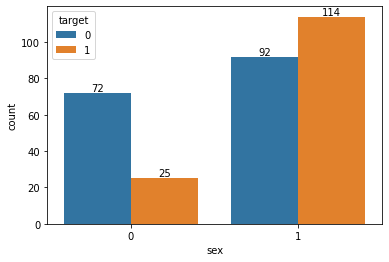

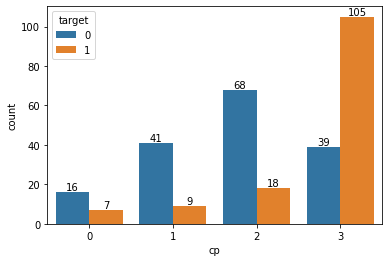

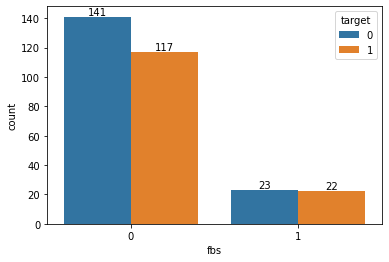

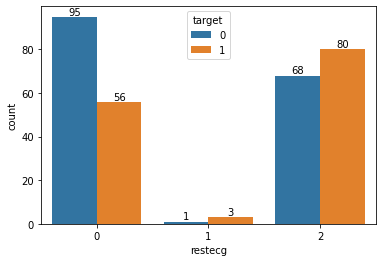

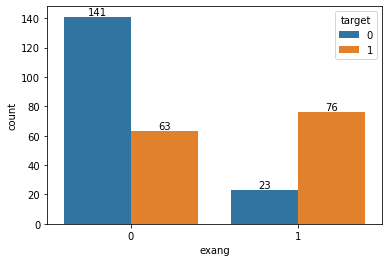

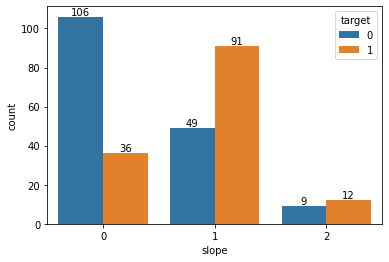

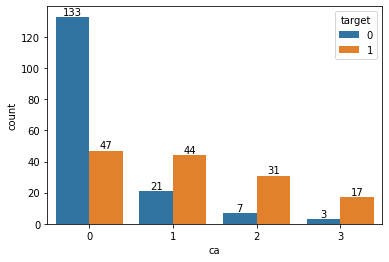

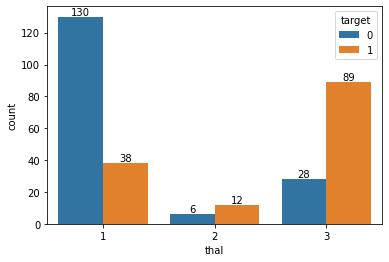

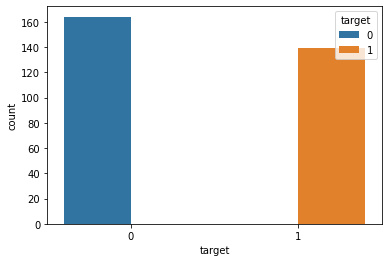

In [105]:
for col in categorical:
    ax = sns.countplot(x=col, hue= 'target', data = df)
    if col != 'target':
        for i in ax.containers:
            ax.bar_label(i,)
    plt.show()

Male gender patients have higher effect on heart disease

# Pair plot

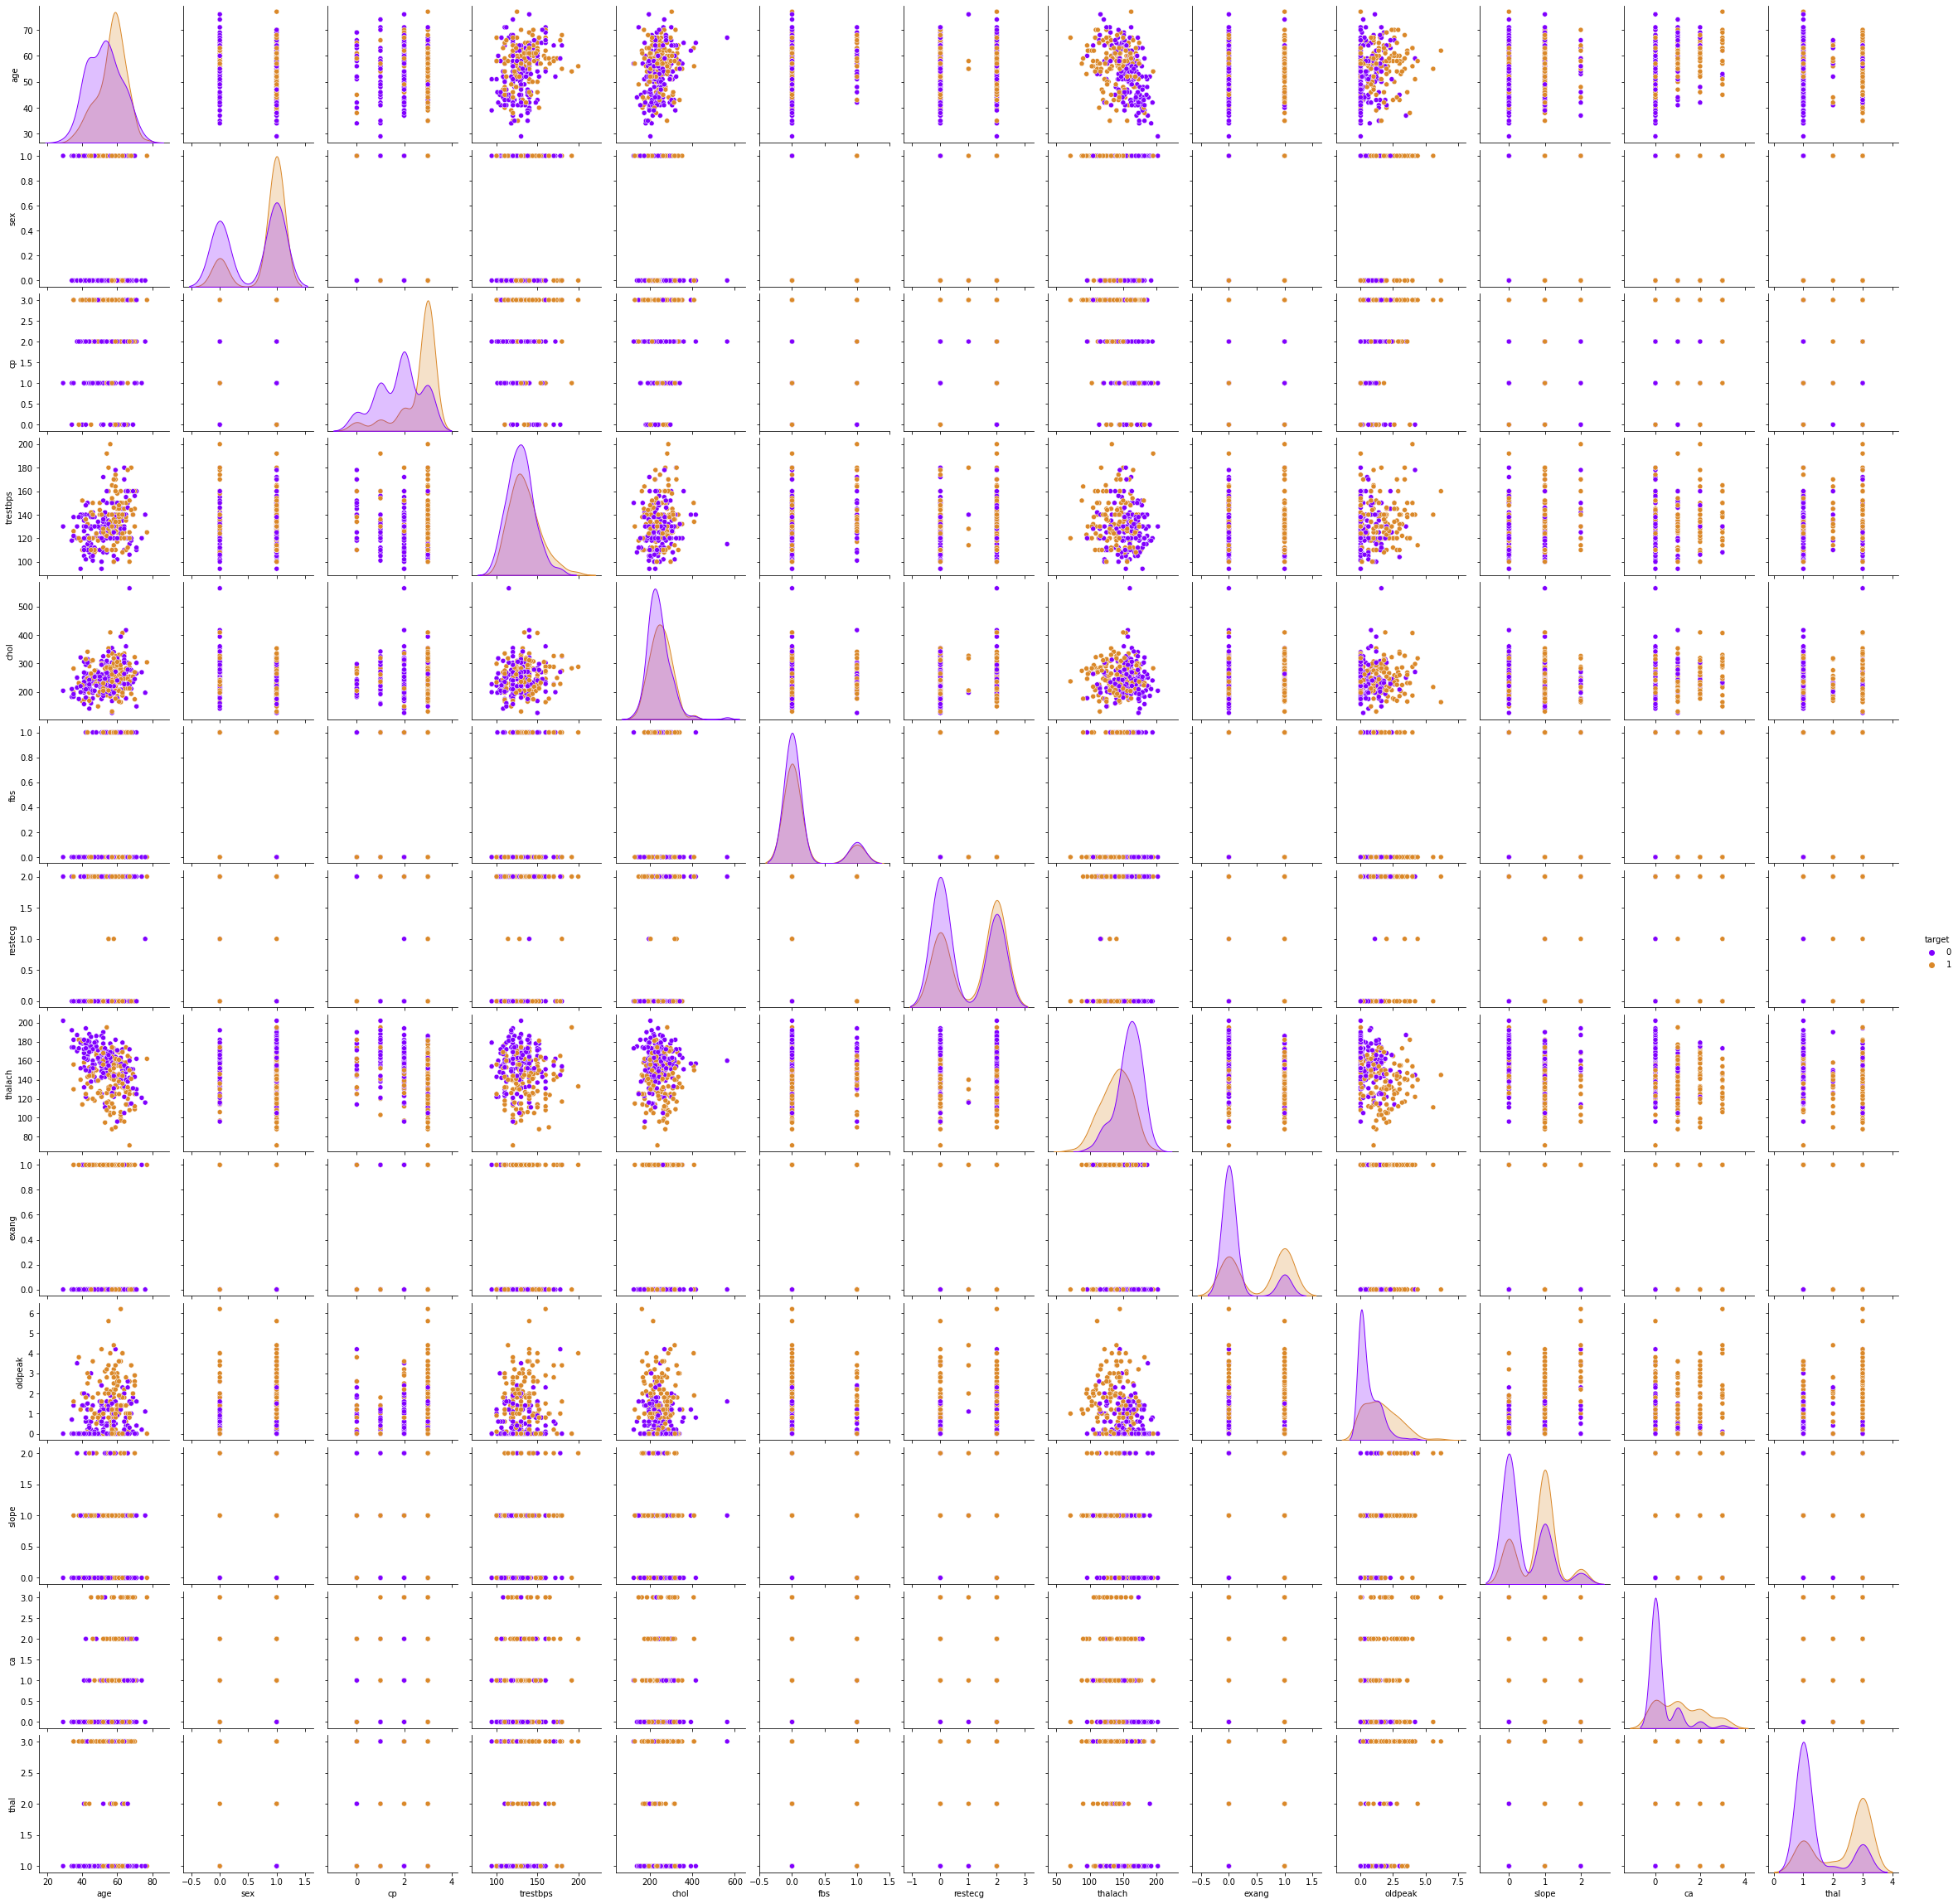

In [106]:
sns.pairplot(df,hue='target',palette = ["#8000ff","#da8829"])
plt.show()

# Correlation Matrix

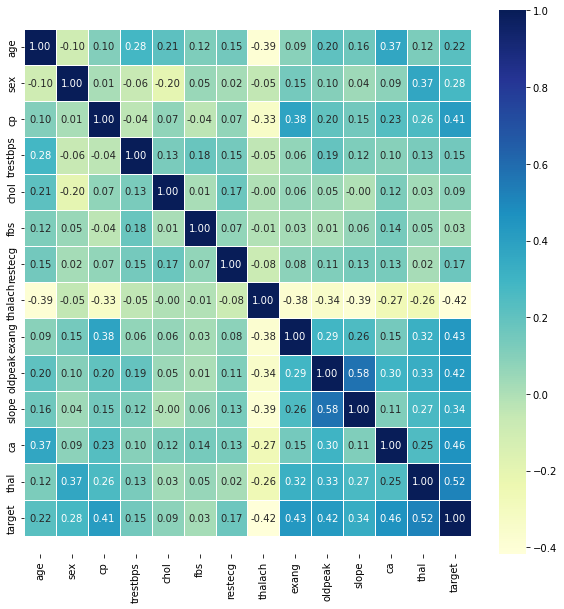

In [107]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

There is a positive correlation to target variable and one variable is negatively correlated

# One -hot Encoding for catagorical

In [108]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
standardScaler = StandardScaler()

In [109]:
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [110]:
#sc = StandardScaler()
#df[continuos] = sc.fit_transform(df[continuos]) 

In [111]:
#determining target and predictors
X=dataset.drop('target',axis=1)
y=dataset['target']

In [112]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0
1,1.392002,1.611220,0.760415,-1.821905,0.397182,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,-1.234430,0.334813,-0.770990,0.138373,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1
299,1.502821,0.700612,-1.038723,-0.376896,2.036303,1,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
300,0.283813,-0.096170,-2.238149,-1.515388,0.138373,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1
301,0.283813,-0.096170,-0.206864,1.068113,-0.896862,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0


# IV and WOE for continous variables

In [113]:
#import monotonic binning to automatically calculate IV values for numeric values

from monotonic_binning.monotonic_woe_binning import Binning

In [114]:
numeric = dataset[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
#numeric

In [115]:
woe={}
iv={}          # list to store information values
for i in numeric:
    var = i     # variable to be binned
    y_var = "target" # the target variable

    bin_object = Binning(y_var, n_threshold = 50, y_threshold = 10, p_threshold = 0.35, sign=False)
    bin_object.fit(dataset[[y_var, var]])

    # Print WOE summary
    print(i,": ",np.sum(bin_object.woe_summary['IV_components']))
    iv[i]=(np.sum(bin_object.woe_summary['IV_components']))
    woe[f'woe_{i}'] = bin_object.woe_summary

age :  0.3653151687693767
trestbps :  0.1085461222344756
chol :  0.12219447106179457
thalach :  0.0
oldpeak :  0.6660418228583669


### I performed feature selection using information value and decided to drop variables with low information value. After performing I Have observed a variable with low IV Score. So, I have decided those variable ('thalach').

In [116]:
#determing predictors and target
X=dataset.drop(['thalach','target'],axis=1)
y=dataset['target']

# Model Fitting on cross validation data

In [159]:
#fitting model on cross validation data using classifier algorithms to classify whether patient has heart disease or not

# Model 1 - Logistic Regression

In [117]:
from sklearn.model_selection import cross_val_score
# Create a logistic regression model
clf = LogisticRegression(**{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'})

# Perform 10-fold cross-validation
scores_r = cross_val_score(clf, X, y, cv=10,scoring='recall')
scores_a = cross_val_score(clf, X, y, cv=10,scoring='accuracy')

#Print the f1 score
print("recall score using k-fold Cross validation:", np.mean(scores_r))
print("Accuracy score using k-fold Cross validation:", np.mean(scores_a))



recall score using k-fold Cross validation: 0.8065934065934066
Accuracy score using k-fold Cross validation: 0.8447311827956989


# Model 2- Decision tree

In [139]:
from sklearn.model_selection import cross_val_score
#Fitting Decision tree classifier Model
dt = DecisionTreeClassifier(ccp_alpha=0.01, max_depth=3)
# Perform 10-fold cross-validation
scores_f1 = cross_val_score(dt, X, y, cv=10,scoring='f1')
scores_r = cross_val_score(dt, X, y, cv=10,scoring='recall')
scores_a = cross_val_score(dt, X, y, cv=10,scoring='accuracy')


#Print the f1 score
print("F1 score using k-fold Cross validation:", np.mean(scores_f1))
print("Recall score using k-fold Cross validation:", np.mean(scores_r))
print("Accuracy score using k-fold Cross validation:", np.mean(scores_a))


F1 score using k-fold Cross validation: 0.7698298457608802
Recall score using k-fold Cross validation: 0.7499999999999999
Accuracy score using k-fold Cross validation: 0.8049462365591398


# Model 3- Random Forest

In [161]:
#Fitting random forest tree classifier Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, n_estimators=1000)
# Perform 10-fold cross-validation
scores_a = cross_val_score(rf, X, y, cv=10,scoring='accuracy')
scores_r = cross_val_score(rf, X, y, cv=10,scoring='recall')
scores_p = cross_val_score(rf, X, y, cv=10,scoring='precision')

#Print the f1 score
print("accuracy score using k-fold Cross validation:", np.mean(scores_a))
print("recall score using k-fold Cross validation:", np.mean(scores_r)) 
print("precision score using k-fold Cross validation:", np.mean(scores_p)) 

accuracy score using k-fold Cross validation: 0.8411827956989247
recall score using k-fold Cross validation: 0.8071428571428572
precision score using k-fold Cross validation: 0.8414002011060834


# Model 4- KNN

In [152]:
classifier = KNeighborsClassifier(**{'n_neighbors': 7, 'weights': 'uniform'})
# Perform 10-fold cross-validation
scores = cross_val_score(classifier, X, y, cv=10,scoring='accuracy')
scores_r = cross_val_score(classifier, X, y, cv=10,scoring='recall')
#Print the f1 score
print("accuracy score using k-fold Cross validation:", np.mean(scores))
print("Recall score using k-fold Cross validation:", np.mean(scores_r)) 

accuracy score using k-fold Cross validation: 0.8281720430107526
Recall score using k-fold Cross validation: 0.7857142857142858


# Model 5 - SVM

In [121]:
from sklearn import svm
clf = svm.SVC(**{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'})
# Perform 10-fold cross-validation
scores = cross_val_score(clf, X, y, cv=10,scoring='accuracy')
scores_r = cross_val_score(clf, X, y, cv=10,scoring='recall')

#Print the f1 score
print("Accuracy score using k-fold Cross validation:", np.mean(scores))
print("Recall score using k-fold Cross validation:", np.mean(scores_r))  

Accuracy score using k-fold Cross validation: 0.8413978494623656
Recall score using k-fold Cross validation: 0.7851648351648352


# Model 6 - Adaboost 

In [160]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(**{'learning_rate': 0.1, 'n_estimators': 87})


# Perform 5-fold cross validationf
precision = cross_val_score(ada_clf,X,y, cv=10, scoring='precision')
recall = cross_val_score(ada_clf,X,y, cv=10, scoring='recall')
f1=cross_val_score(ada_clf,X,y, cv=10, scoring='f1')
accuracy=cross_val_score(ada_clf,X,y, cv=10, scoring='accuracy')
#Print the f1 score
print("F1 score using k-fold Cross validation:", np.mean(precision))
print("recall score using k-fold Cross validation:", np.mean(recall))
print("precision score using k-fold Cross validation:", np.mean(f1))
print("accuracy score using k-fold Cross validation:", np.mean(accuracy))   

F1 score using k-fold Cross validation: 0.8499384683943507
recall score using k-fold Cross validation: 0.8
precision score using k-fold Cross validation: 0.8180061511841267
accuracy score using k-fold Cross validation: 0.8377419354838709


# Model 7- Xg Boost classifier

In [162]:
import xgboost as xgb
# Create XGBoost classifier
xgb_clf = xgb.XGBClassifier(**{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50})

# Perform 5-fold cross validation
score_r = cross_val_score(xgb_clf,X,y, cv=10,scoring='recall')
scores_a = cross_val_score(xgb_clf,X,y, cv=10,scoring='accuracy')
#Print the f1 score
print("recall score using k-fold Cross validation:", np.mean(scores_r))
print("accuracy score using k-fold Cross validation:", np.mean(scores_a))  

recall score using k-fold Cross validation: 0.8071428571428572
accuracy score using k-fold Cross validation: 0.8213978494623657


In [89]:
#pip install monotonic_binning 

#### I performed feature selection using information value and decided to drop variables with low information value. After performing I Have observed a variable with low IV Score. So, I have decided those variable ('thalach').

# Hyperparameter on randomForest

In [125]:
 #Define the parameter grid to search over
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'n_estimators':[500,1000,1500]
}

# Create a decision tree classifier object
dtc = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X, y)

# Get the best estimator
best_dtc = grid_search.best_estimator_


In [126]:
best_dtc

RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=500)

# Best model is random forest after tunning

In [128]:
#Fitting random forest tree classifier Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, n_estimators=1000)
# Perform 10-fold cross-validation
scores_a = cross_val_score(rf, X, y, cv=10,scoring='accuracy')
scores_R = cross_val_score(rf, X, y, cv=10,scoring='recall')
#Print the score
print("Accuracy score using k-fold Cross validation:", np.mean(scores_a))
print("Recall score using k-fold Cross validation:", np.mean(scores_R))


Accuracy score using k-fold Cross validation: 0.8444086021505376
Recall score using k-fold Cross validation: 0.8142857142857143


# Hyperparameter tunning on Decisiontree

In [129]:
#Define the parameter grid to search over
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}

# Create a decision tree classifier object
dtc =  DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X, y)

# Get the best estimator
best_dtc = grid_search.best_estimator_

In [130]:
best_dtc

DecisionTreeClassifier(max_depth=3)

# Ada boost hyperparameter tunning

In [131]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.01, 0.1, 1.0],
}

# Create the AdaBoost Classifier
clf = AdaBoostClassifier()

# Create the RandomizedSearchCV object with 'f1' as the scoring metric
rand_search = RandomizedSearchCV(clf, param_distributions=param_dist, cv=10, scoring='recall', n_iter=10, random_state=42)

# Fit the RandomizedSearchCV object to the training data
rand_search.fit(X, y)

# Get the best hyperparameters
best_params = rand_search.best_params_


In [132]:
best_params

{'learning_rate': 0.1, 'n_estimators': 87}

# Hyperparameter tunning on Xgboost classifier

In [133]:
# Define the hyperparameters to tune
hyperparameters = {
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

# Create an XGBoost classifier
clf = xgb.XGBClassifier()

# Perform a grid search over the hyperparameters using cross-validation
grid_search = GridSearchCV(clf, hyperparameters, cv=5)

# Fit the grid search to the training data
grid_search.fit(X, y)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


# Hyperparameters tunning on Knn 

In [134]:
# Define the hyperparameters to tune
hyperparameters = {
    'n_neighbors': [3, 5, 7,9],
    'weights': ['uniform', 'distance']
}

# Create a KNN classifier
clf = KNeighborsClassifier()

# Perform a grid search over the hyperparameters using cross-validation
grid_search = GridSearchCV(clf, hyperparameters, cv=10)

# Fit the grid search to the training data
grid_search.fit(X, y)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'n_neighbors': 7, 'weights': 'uniform'}


# Hyperparameter tunning on SVC

In [135]:
from sklearn.svm import SVC
# Define the hyperparameters to tune
hyperparameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'scale', 'auto']
}

# Create an SVM classifier
clf = SVC()

# Perform a grid search over the hyperparameters using cross-validation
grid_search = GridSearchCV(clf, hyperparameters, cv=5)

# Fit the grid search to the training data
grid_search.fit(X, y)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


# Hyperparameters tunning on logistic regression

In [136]:
# Define the logistic regression model
model = LogisticRegression()

# Define the hyperparameters to be tuned
param_grid = {
    'penalty': ['l1', 'l2'], 
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Define the grid search object
grid_search = GridSearchCV(model, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the grid search object to the training data
grid_search.fit(X, y)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Evaluate the model on the test data using the best parameters
best_model = grid_search.best_estimator_
test_score = best_model.score(X, y)
print("Test score: ", test_score)

Best parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best score:  0.8447311827956989
Test score:  0.8646864686468647


# pre pruning decision tree

In [137]:
from sklearn.metrics import make_scorer,f1_score
# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Define the range of ccp_alpha values to search over
param_grid = {'ccp_alpha': [0.001, 0.01, 0.1, 1, 10]}

# Define the performance metric to optimize for
scorer = make_scorer(f1_score)

# Perform grid search to find the best value of ccp_alpha
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=10, scoring=scorer)
grid_search.fit(X, y)

# Train a decision tree classifier on the full dataset using the best value of ccp_alpha
dt_pruned = DecisionTreeClassifier(ccp_alpha=grid_search.best_params_['ccp_alpha'])
dt_pruned.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.01)

# post pruning on decision tree

In [138]:
# Define the hyperparameters to search over
param_grid = {
    'ccp_alpha': [0.001, 0.01, 0.1, 1, 10],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

# Define the performance metric to optimize for
scorer = make_scorer(f1_score)

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Perform grid search to find the best combination of hyperparameters
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=10, scoring=scorer)
grid_search.fit(X, y)

# Train a decision tree classifier on the full dataset using the best combination of hyperparameters
dt_pruned = DecisionTreeClassifier(ccp_alpha=grid_search.best_params_['ccp_alpha'],
                                   max_depth=grid_search.best_params_['max_depth'],
                                   min_samples_split=grid_search.best_params_['min_samples_split'])
dt_pruned.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=3)

"After tuning the hyperparameters, the model's performance has significantly improved in terms of Accuracy and recall

# Insights:
    
why recall is equal ?
If both models have the same performance in correctly identifying the relevant items, they will have the same recall scores. This could happen if the two models are equally effective in capturing the relevant patterns in the data.

However, it is also possible that the two models have the same recall scores by coincidence. It is important to evaluate multiple metrics and conduct statistical tests to ensure that the results are reliable and not due to chance. Additionally, other factors, such as precision, accuracy, and F1 score, should also be considered to fully evaluate the performance of the models.



recall is important evaluation metrics in our prediction

Recall is an important metric for heart disease prediction because it measures the ability of a machine learning model to correctly identify all cases of heart disease.The loss of failing to detect heart disease in a machine learning model can have severe consequences, including increased morbidity and mortality. Early detection of heart disease is critical for improving health outcomes, and machine learning models can play an important role in assisting healthcare providers in accurate diagnosis and treatment.

# Challenges and Limitations:
Despite their potential, machine learning models for heart disease prediction face several challenges and limitations.
One major challenge is the lack of standardized datasets and features for heart disease prediction. Datasets may vary in terms of quality, completeness, and representativeness, which can affect the performance of machine learning models. 

# Conclusion

Several machine learning models have been used to predict heart disease, Among All the classification Algorithms that I have taken to predict the outcome of patient having heart disease. Random forest xg boost are performing better and giving better scores of "Recall" and "Precision". Moreover, the maximum Recall obtained by Random forest is 81% and xg_boost classifier with 80%. Random forest is giving overall good scores. so, choosing random forest as Better model performance.